In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from scipy.optimize import curve_fit
from astropy import units as u
from astropy import constants as const
import time
import pandas as pd

In [59]:
SN = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_10solM/YM.snr1",skiprows = 8)
SN_1M_Kroupa =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_1solM/YM_1Mcont_Kroupa.snr1",skiprows = 8)
SN_1M_TopHeavy =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_TopHeavy_1solM/YM_1Mcont_TopHeavy.snr1",skiprows = 8)
SN_1M_Salpeter = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Salpeter_1solM/Salpeter_normal.snr1", skiprows = 8)


Important note: the starburst99 model (see: https://www.stsci.edu/science/starburst99/docs/default.htm)was used to generate the plots found below. I kept all the parameters on their default values except for the star-formation rate which I changed from 1 $M_{\odot}$yr$^{-1}$ to 10 $M_{\odot}$yr$^{-1}$.

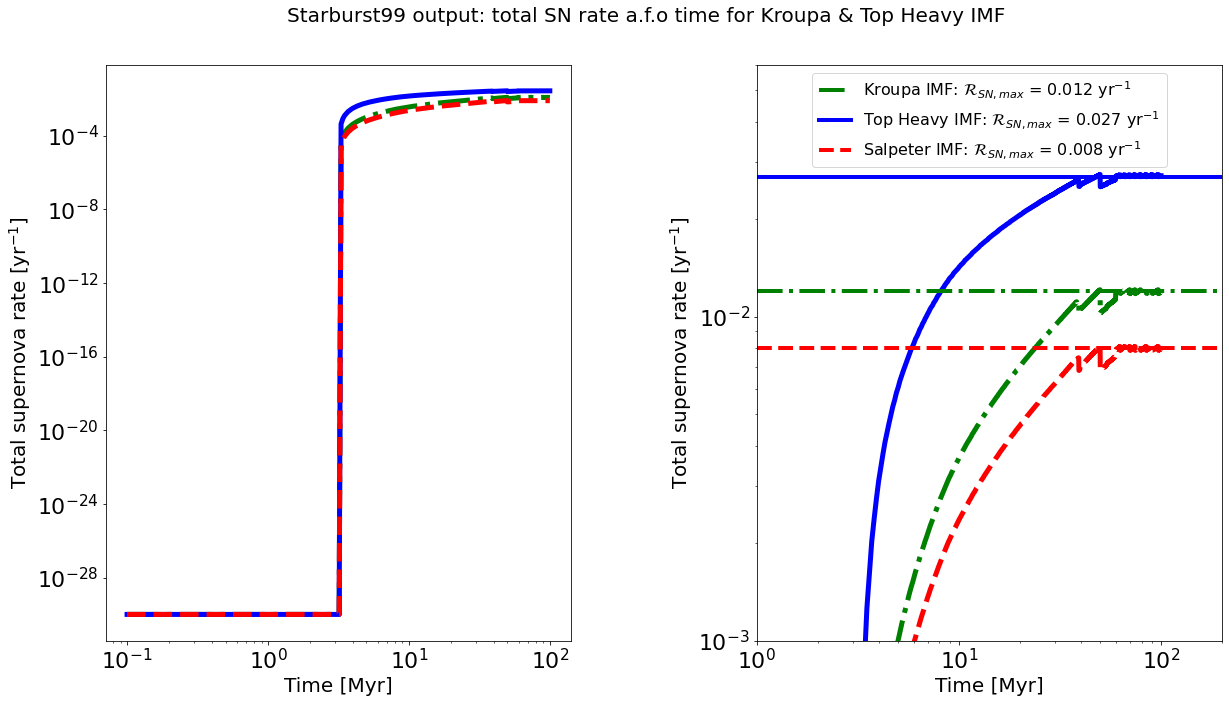

In [60]:

fig, axs = plt.subplots(1,2)

SN_10M_Kroupa_time = np.array([i[0] for i in SN])
SN_rate_10M_Kroupa = [pow(10,i[1]) for i in SN]

SN_1M_Kroupa_time = np.array([i[0] for i in SN_1M_Kroupa])
SN_rate_1M_Kroupa = [pow(10,i[1]) for i in SN_1M_Kroupa]

SN_1M_TopHeavy_time = np.array([i[0] for i in SN_1M_TopHeavy])
SN_rate_1M_TopHeavy = [pow(10,i[1]) for i in SN_1M_TopHeavy]

SN_rate_1M_Salpeter = [pow(10,i[1]) for i in SN_1M_Salpeter]
SN_1M_Salpeter_time = np.array([i[0] for i in SN_1M_Salpeter])

SN_Kroupa_max = round(max(SN_rate_1M_Kroupa),3)
SN_TopHeavy_max = round(max(SN_rate_1M_TopHeavy),3)
SN_Salpeter_max =  round(max(SN_rate_1M_Salpeter),3)


axs[1].set_xlim(1e6/1e6,2e8/1e6)
axs[1].set_ylim(1e-3,0.06)



fig.set_figheight(10)
fig.set_figwidth(20)


for i in range(2):
    axs[i].plot(SN_1M_Kroupa_time/1e6 ,SN_rate_1M_Kroupa, c= 'g', linewidth = 5, linestyle = 'dashdot')
    axs[i].plot(SN_1M_TopHeavy_time/1e6 ,SN_rate_1M_TopHeavy ,c= 'b', linewidth = 5)
    axs[i].plot(SN_1M_Salpeter_time/1e6 ,SN_rate_1M_Salpeter ,c= 'r', linewidth = 5, linestyle ='dashed')
    #axs[i].plot(SN_10M_Kroupa_time/1e6, SN_rate_10M_Kroupa, c= 'orange', linewidth = 5)
    
    axs[i].set_ylabel("Total supernova rate [yr$^{-1}$]",fontsize = 20)
    axs[i].set_xlabel("Time [Myr]",fontsize = 20)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].tick_params(axis='both', labelsize=22)

axs[1].axhline(y = SN_Kroupa_max ,color = 'g', 
                   linestyle= 'dashdot', label = 'Kroupa IMF: $\mathcal{R}_{SN,max}$ = ' + str(SN_Kroupa_max) +' yr$^{-1}$', linewidth = 4)
    
axs[1].axhline(y = SN_TopHeavy_max ,color = 'b',
                   label =  'Top Heavy IMF: $\mathcal{R}_{SN,max}$ = ' +  str(SN_TopHeavy_max) +' yr$^{-1}$', linewidth = 4)
    
axs[1].axhline(y = SN_Salpeter_max ,color = 'r', linestyle = "dashed",
                   label =  'Salpeter IMF: $\mathcal{R}_{SN,max}$ = ' +  str(SN_Salpeter_max) +' yr$^{-1}$', linewidth = 4)


plt.tick_params(axis='both', which='major', labelsize=22)


fig.suptitle("Starburst99 output: total SN rate a.f.o time for Kroupa & Top Heavy IMF", fontsize = 20)
axs[1].legend(loc = 'upper center' , fontsize = 16) 
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.35)



Initially the SN rate is at zero is at zero because the stars did not finish their stellar evolution track. Then after about 30 Myr, stars consistently start to go supernova, which stabelizes after about 100 Myr. Applying this result to galaxies therefore requires a continious star-forming activity which has been going on for about 50-100 Myr.

From the comparison between supernova rates for different IMFs, a few conclusions are drawn. First, we see that the Salpeter IMF leads to a smaller supernova rate than the Kroupa IMF. The fundamental difference between these IMFs is the flattening of the Kroupa IMF exponent in the stellar-mass range < 0.5 $M_{\odot}$ as opposed to the Salpeter IMF. Therefore, if we imagine two gas reservoirs, each described by one of the two IMFs, we expect relatively more high-mass stars to be produced in the Kroupa reservoir, and therefore more stars eventually going supernova. By extension, one readily explains the lower supernova rate for the Salpeter IMF vs Top-heavy IMF.  

(20000000.0, 200000000.0)

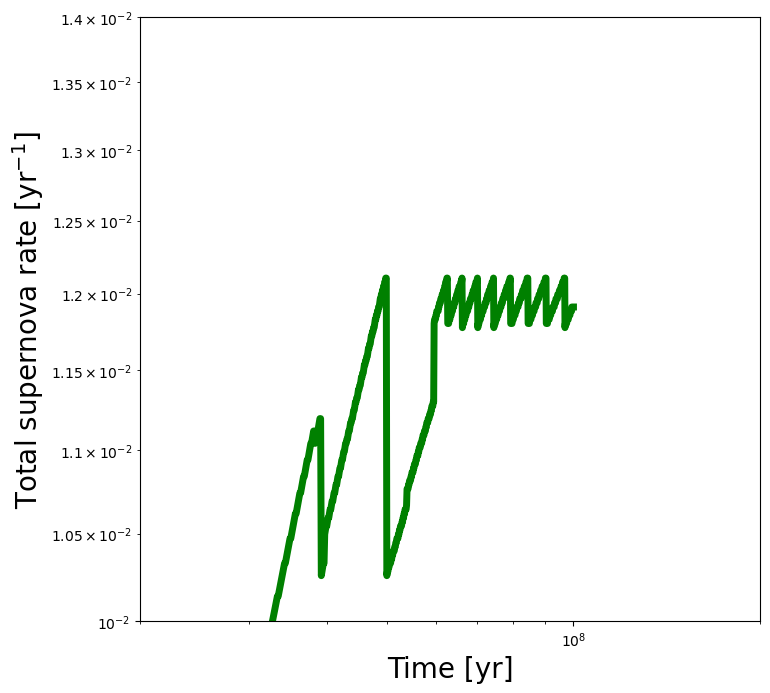

In [61]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(SN_1M_Kroupa_time,SN_rate_1M_Kroupa, c= 'g', linewidth = 5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Total supernova rate [yr$^{-1}$]",fontsize = 20)
plt.xlabel("Time [yr]",fontsize = 20)

plt.ylim(1e-2,1.4e-2)
plt.xlim(2e7,2e8)

In [62]:
test = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_1solM/YM_1Mcont_Kroupa.spectrum1",skiprows = 6)
test2 = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_TopHeavy_1solM/YM_1Mcont_TopHeavy.spectrum1",skiprows = 6)

print(test)
from scipy import integrate


df = pd.DataFrame({ 'Time stamp': [i[0] for i in test], 'WL': [i[1] for i in test], 'Output_stellar': [pow(10,i[3]) for i in test]
})

df2 = pd.DataFrame({ 'Time stamp': [i[0] for i in test2], 'WL': [i[1] for i in test2], 'Output_stellar': [pow(10,i[3]) for i in test2]
})


df_1e8 = df.loc[(df['Time stamp' ] >= 0.98*1e8) &(df['Time stamp'] < 0.1*1e9 ) ]
df2_1e8 = df2.loc[(df2['Time stamp' ] >= 0.98*1e8) & (df2['Time stamp' ] < 0.1*1e9)]


WL_array_1e8 = df_1e8[['WL']].values
WL_array_1e8_2 = df2_1e8[['WL']].values

WL_array_1e8_balmer = [i[0] for i in WL_array_1e8 if i > 912 and i < 3646]
WL_array_1e8_balmer_2 = [i[0] for i in WL_array_1e8_2 if i > 912 and i < 3646]


output_stellar_1e8 = df_1e8[['Output_stellar']].values
output_stellar_1e8_2 = df2_1e8[['Output_stellar']].values

output_stellar_1e8_balmer = [output_stellar_1e8[i][0] for i in range(len(output_stellar_1e8)) 
                      if WL_array_1e8[i] > 912 and WL_array_1e8[i] < 3646]

output_stellar_1e8_balmer_2 = [output_stellar_1e8_2[i][0] for i in range(len(output_stellar_1e8_2)) 
                      if WL_array_1e8_2[i] > 912 and WL_array_1e8_2[i] < 3646]


[[ 1.000000e-05  9.100000e+01  1.495993e+01  1.495993e+01 -1.500000e+01]
 [ 1.000000e-05  9.400000e+01  1.570373e+01  1.570373e+01 -1.500000e+01]
 [ 1.000000e-05  9.600000e+01  1.620782e+01  1.620782e+01 -1.500000e+01]
 ...
 [ 1.000000e+08  1.200000e+06  3.546948e+01  3.088139e+01  3.546947e+01]
 [ 1.000000e+08  1.400000e+06  3.534454e+01  3.064606e+01  3.534453e+01]
 [ 1.000000e+08  1.600000e+06  3.516845e+01  3.045177e+01  3.516844e+01]]


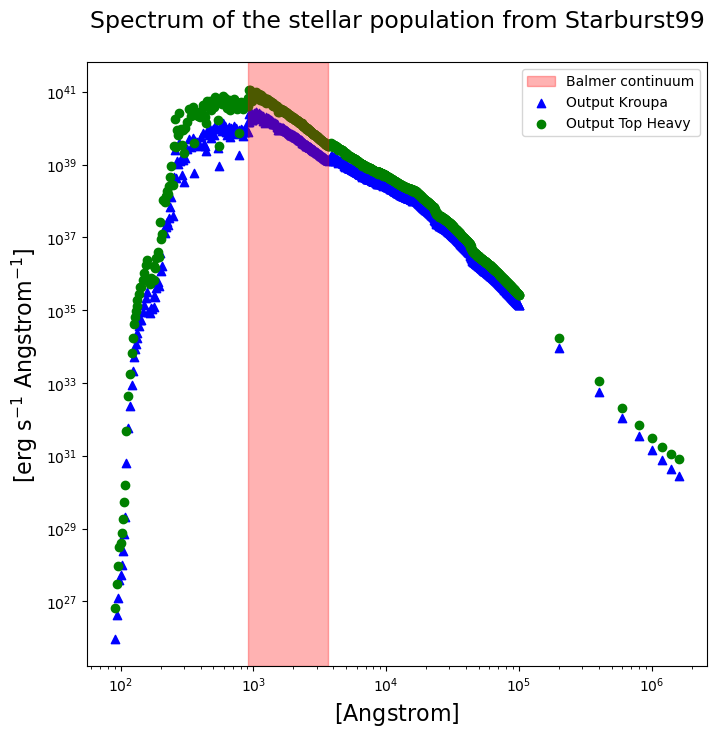

In [63]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(WL_array_1e8, output_stellar_1e8, label = "Output Kroupa", marker = "^", c= 'b')
plt.scatter(WL_array_1e8_2, output_stellar_1e8_2, label = "Output Top Heavy", marker = "o",c = 'g')
plt.axvspan(912,3646, alpha = 0.3, color = 'red', label = 'Balmer continuum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[$\mathrm{Angstrom}$]', fontsize = 16)
plt.ylabel('[erg s$^{-1}$ $\mathrm{Angstrom}^{-1}$]', fontsize = 16)
plt.title("Spectrum of the stellar population from Starburst99\n", fontsize = 17 )
plt.legend()



Integration 912 < lambda < 3646 A:  2.0232983670558285e+43 erg s^-1


(1000.0, 4000.0)

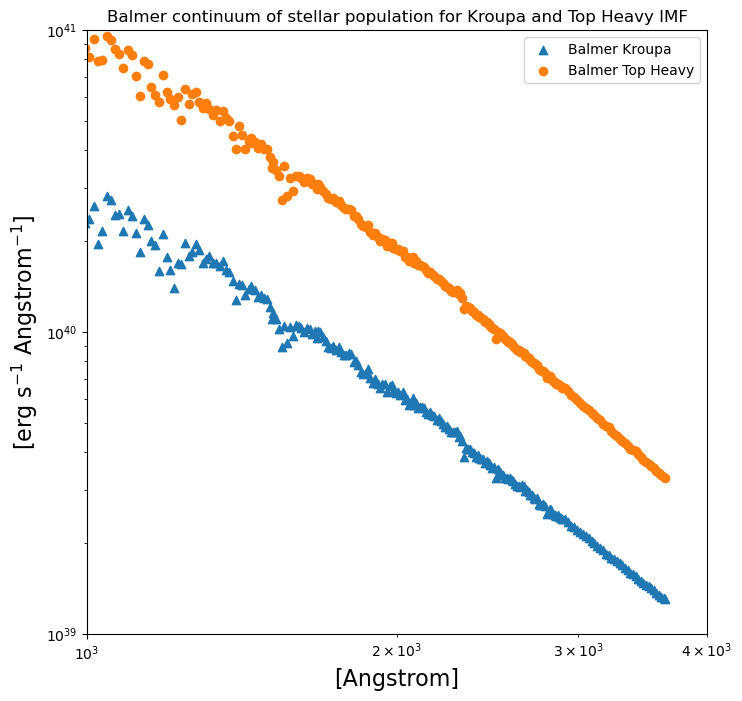

In [64]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(WL_array_1e8_balmer, output_stellar_1e8_balmer, label = "Balmer Kroupa", marker = "^")
plt.scatter(WL_array_1e8_balmer_2, output_stellar_1e8_balmer_2, label = "Balmer Top Heavy", marker = "o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[Angstrom]', fontsize = 16)
plt.ylabel('[erg s$^{-1}$ $\mathrm{Angstrom}^{-1}$]', fontsize = 16)
plt.legend()

print('Integration 912 < lambda < 3646 A: ',integrate.simps(y = output_stellar_1e8_balmer, x= WL_array_1e8_balmer ), 'erg s^-1')
plt.title('Balmer continuum of stellar population for Kroupa and Top Heavy IMF')
plt.ylim(1e39,1e41)
plt.xlim(1e3,4e3)

The 912 1 < $\lambda$ < 3646 A = 91.2 nm < $\lambda$ 364.6 nm is fully within the ultra-violet range. The lower boundary of 912 A corresponds to E $\approx$ 13.6 eV, which is the energy required to ionize hydrogen.